In [97]:
CODE_REPO_PATH='/YOUR_PATH/Converting_allo_goal_to_ego_steering/analysis/'

import warnings
warnings.filterwarnings('ignore')

from importlib import reload
import sys
import os
import numpy as np
import scipy as sc
import pandas as pd

sys.path.insert(0, CODE_REPO_PATH)
import read_data as rd
import pfl3_stim as ps

%config InlineBackend.figure_format = 'retina'

In [5]:
DATA_PATH='/YOUR_PATH/Converting_allo_goal_to_ego_steering/data/'
FIGURE_PATH='/YOUR_PATH/Converting_allo_goal_to_ego_steering/Figures/pdf_and_png/'
SOURCE_DATA_PATH='/YOUR_PATH/Converting_allo_goal_to_ego_steering/source_data/'

save_figure=False
save_source_data=False

### Load PFL3 CsChrimson,  PFL3 no CsChrimson & PFL1CsChrimson recordings

In [ ]:
reload(ps)
genotypes=ps.load_data(DATA_PATH,reprocess=True)

### Get stimulation trials

In [64]:
reload(ps)
abf_trials_df,im_trials_df=ps.get_trials(genotypes)

In [65]:
reload(ps)
fly_mean_abf_trials_df,mean_signals_df=ps.get_mean_signals_df(abf_trials_df,im_trials_df)

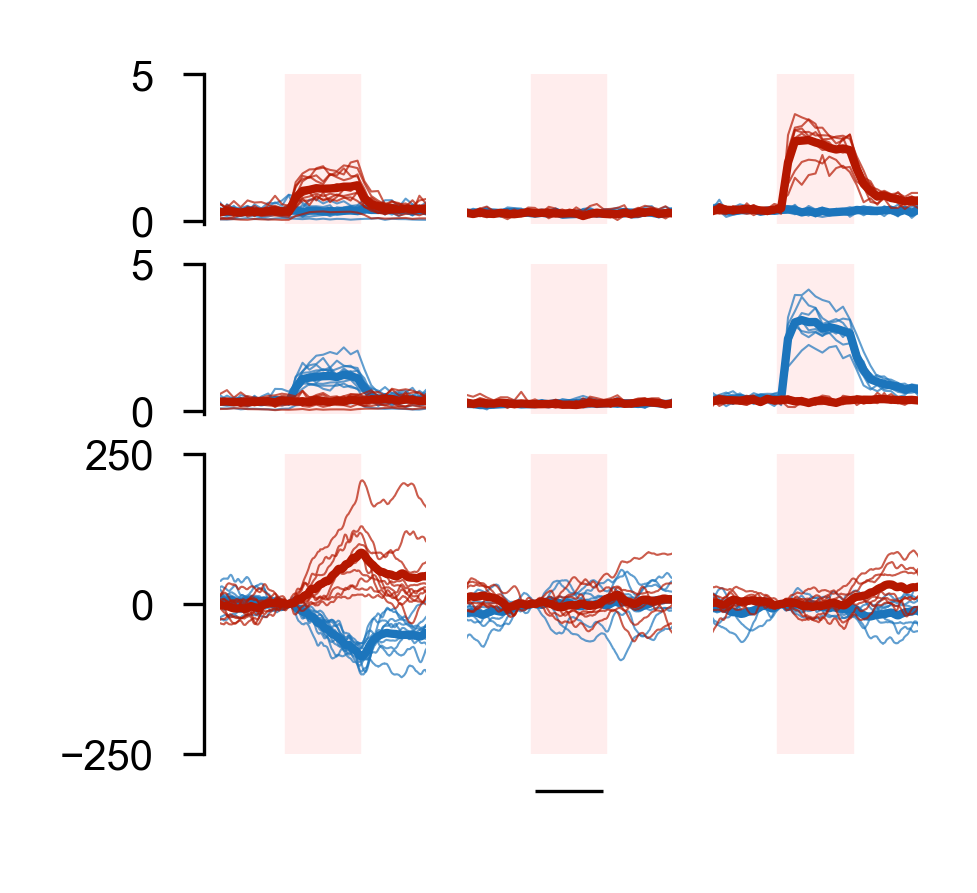

In [66]:
reload(ps)
ps.plot_mean_signals(mean_signals_df,
                     save=save_figure,
                     savepath=FIGURE_PATH,
                    fname='Fig_5g.pdf')

### Example fly


In [67]:
reload(ps)
example_fly_df=ps.get_example_fly_df(abf_trials_df,im_trials_df)

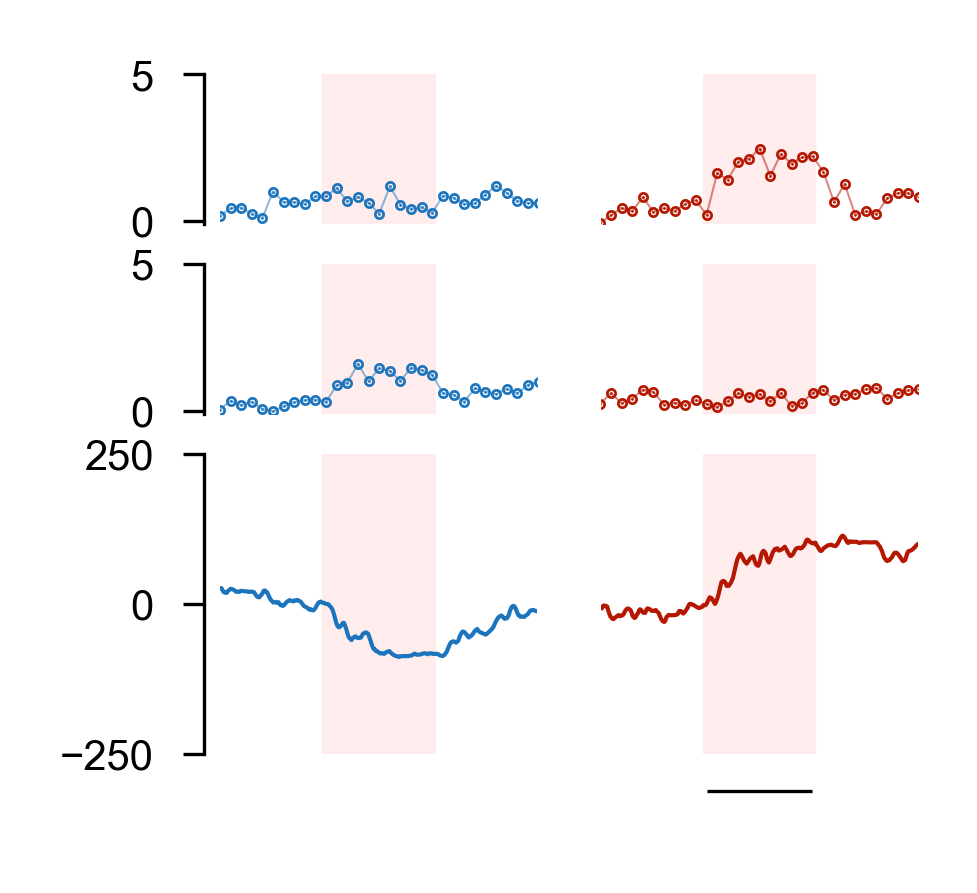

In [68]:
reload(ps)
ps.plot_example_fly(example_fly_df,
                    save=save_figure,
                    savepath=FIGURE_PATH,
                   fname='Fig_5f.pdf')

### Summary statistic of mean fly ipsilateral turning velocity during stimulation (Fig. 5h)

In [69]:
reload(ps)
summary_abf_trials_df,summary_im_trials_df =ps.get_summary(abf_trials_df,im_trials_df)

In [70]:
reload(ps)
mean_during,genotype_mean=ps.get_mean_ipsi_df(summary_abf_trials_df,
                                             save=save_source_data,
                                             savepath=SOURCE_DATA_PATH,
                                             fname='Fig_5h.csv')

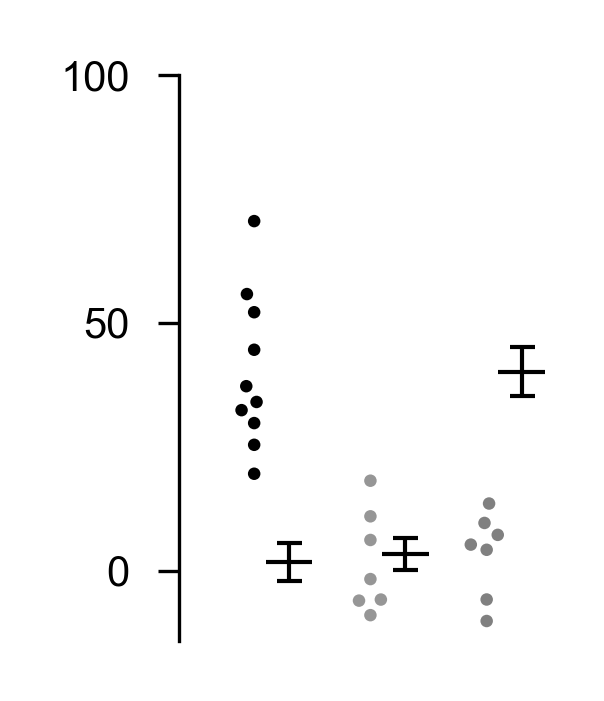

In [71]:
reload(ps)
ps.plot_mean_ipsi(mean_during,genotype_mean,
                  save=save_figure,
                  savepath=FIGURE_PATH,
                 fname='Fig_5h.pdf')

In [85]:
pfl3_chr_mean= mean_during.query('genotype=="VT000355-AD-VT037220-DBD-Chr-GC7f"')['mean_ipsi']
pfl3_ctl_mean = mean_during.query('genotype=="VT000355-AD-VT037220-DBD-GC7f"')['mean_ipsi']
pfl1_chr_mean = mean_during.query('genotype=="SS02239-Chr-GC7f"')['mean_ipsi']

print(len(pfl3_chr_mean), 'PFL3 CsChrimson flies')
print(len(pfl3_ctl_mean),'PFL3 no CsChrimson flies')
print(len(pfl1_chr_mean), 'PFL1 CsChrimson flies')

10 PFL3 CsChrimson flies
7 PFL3 no CsChrimson flies
7 PFL1 CsChrimson flies


p-value for PFL3 CsChrimson vs. PFL3 No CsChrimson

In [86]:
sc.stats.ttest_ind(pfl3_chr_mean,pfl3_ctl_mean,equal_var=False)[1]

1.9319305892265354e-05

p-value PFL1 CsChrimson vs. PFL3 No CsChrimson

In [87]:
sc.stats.ttest_ind(pfl1_chr_mean,pfl3_ctl_mean,equal_var=False)[1]

0.755818050548192

% PFL3 CsChrimson trials where fly turned in wrong direction

In [88]:
print(np.sum(summary_abf_trials_df.query('genotype=="VT000355-AD-VT037220-DBD-Chr-GC7f"')['mean_ipsi_dheading_during']<=0)/len(summary_abf_trials_df.query('genotype=="VT000355-AD-VT037220-DBD-GC7f-Chr"')['mean_ipsi_dheading_during']))

inf


In [89]:
# total trials
len(summary_abf_trials_df.query('genotype=="VT000355-AD-VT037220-DBD-Chr-GC7f"')['mean_ipsi_dheading_during'])

100

### Turning velocity vs. R-L (z-scored) during stimulation (ED Fig. 10b)

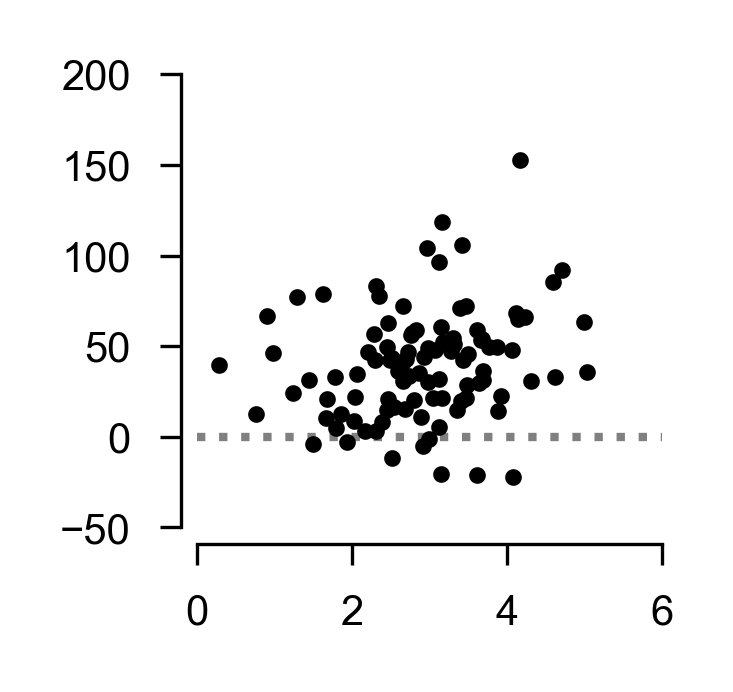

In [90]:
reload(ps)
ps.plot_ipsi_turning_vs_ipsi_rmlz(summary_abf_trials_df, 
                                   save_figure=save_figure,
                                  save_figure_path=FIGURE_PATH,
                                   figure_fname='ED_Fig_10b.pdf',
                                   save_source_data=save_source_data,
                                   save_source_data_path=SOURCE_DATA_PATH,
                                   source_data_fname='ED_Fig_10b.csv')

### Turning velocity during stim. vs. forward walking velocity before stim. (ED Fig. 10c)

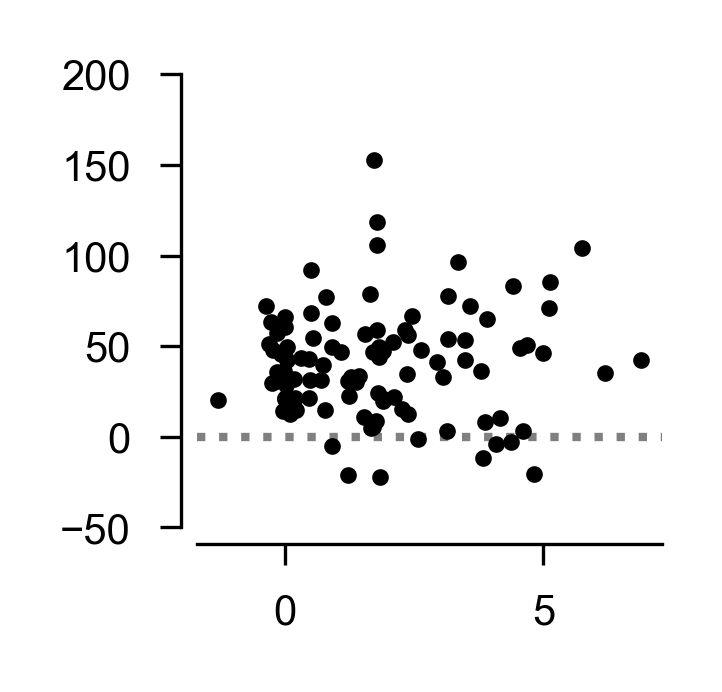

In [91]:
reload(ps)
ps.plot_ipsi_turning_vs_dforw_before(summary_abf_trials_df, 
                                   save_figure=save_figure,
                                   save_figure_path=FIGURE_PATH,
                                   figure_fname='ED_Fig_10c.pdf',
                                   save_source_data=save_source_data,
                                   save_source_data_path=SOURCE_DATA_PATH,
                                   source_data_fname='ED_Fig_10c.csv')

### Turning velocity during stim. vs. turning  velocity before stim. (ED Fig. 10d)

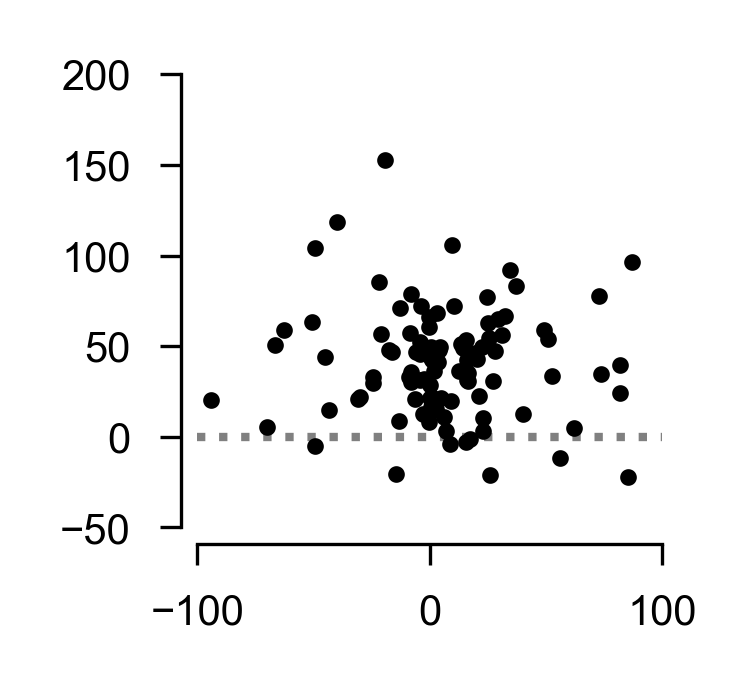

In [92]:
reload(ps)
ps.plot_ipsi_turning_vs_dheading_before(summary_abf_trials_df, 
                                   save_figure=save_figure,
                                   save_figure_path=FIGURE_PATH,
                                   figure_fname='ED_Fig_10d.pdf',
                                   save_source_data=save_source_data,
                                   save_source_data_path=SOURCE_DATA_PATH,
                                   source_data_fname='ED_Fig_10d.csv')

# Save processed data

In [95]:
PROCESSED_DATA_PATH='/YOUR_PATH/Converting_allo_goal_to_ego_steering/shared_data/shared_data/PFL3_LAL_stimulation/'

In [140]:
ps.save_processed_data(PROCESSED_DATA_PATH,genotypes)